In [20]:
import numpy as np
import scipy.integrate as integrate
import math

# Datos proporcionados
N_list = [1, 1, 1, 1, 1, 1, 2, 1]
A_list = [10.335672, 5.553473, 3.453336, 2.416445, 1.555772, 0.889955, 0.637402, 0.626614]
C_list = [0.002018082754, -0.072792117640, -0.208121324693, -1.146303389482, 
          -0.011000884459, 0.000579544718, -0.000711208001, -0.000380564870]

# Cálculo de la función de onda radial R(r)
def R(r):
    result = 0.0
    for N_i, A_i, C_i in zip(N_list, A_list, C_list):
        K_i = np.power(2*A_i, N_i + 0.5)/np.sqrt(math.factorial(2*N_i))
        result += C_i *K_i* (r ** (N_i - 1)) * np.exp(-A_i * r)/np.sqrt(2)
    return result

# Normalización: ∫₀^∞ |R(r)|² r² dr
norm_integral, error = integrate.quad(lambda r: R(r)**2 * r**2, 0, np.inf, epsabs=1.49e-14, epsrel=1.49e-14, limit=1000)


norm_integral, error


(0.9999999873835927, 1.3815938746229745e-14)

In [ ]:
from pyDOE3 import *
import pandas as pd

full_factorial_design = fullfact([2, 2, 2, 2, 2, 2, 2, 2])
# Generación de un diseño factorial fraccionado
frac_factorial_design = fracfact('A B AB')
# Generacion de un diseño de Plackett-Burman
pb_design = pbdesign(8)

print("Full Factorial length:")
print(len(full_factorial_design))

print("Frac Factorial design:")
print(len(frac_factorial_design))

print("Plackett-Burman design:")
print(len(pb_design))




Full Factorial length:
256
Frac Factorial design:
4
Plackett-Burman design:
12


: 


Efectos estimados:
     Effect
A  9.857150
C  6.174631
E  3.736969
B  1.156802
G -0.580529
F  0.250667
D -0.162703


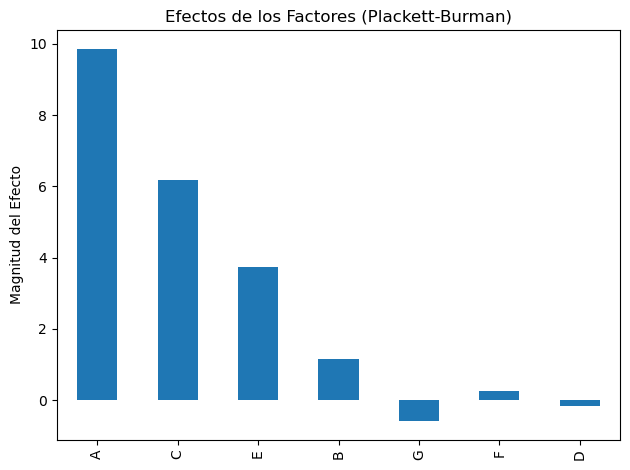


ANOVA:
           df        sum_sq     mean_sq    F  PR(>F)
A         1.0  1.943268e+02  194.326824  0.0     NaN
B         1.0  2.676380e+00    2.676380  0.0     NaN
C         1.0  7.625214e+01   76.252144  0.0     NaN
D         1.0  5.294438e-02    0.052944  0.0     NaN
E         1.0  2.792987e+01   27.929873  0.0     NaN
F         1.0  1.256682e-01    0.125668  0.0     NaN
G         1.0  6.740268e-01    0.674027  0.0     NaN
Residual  0.0  5.490287e-29         inf  NaN     NaN


c:\Users\Ivan_lg\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


In [2]:
from pyDOE3 import pbdesign
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Crear un diseño Plackett-Burman para 7 factores
design = pbdesign(7)
columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df = pd.DataFrame(design, columns=columns)

# 2. Simular una respuesta con algunos factores que afectan el resultado
# Supongamos que A, C y E tienen efectos reales
np.random.seed(42)
df['Response'] = (
    5 * df['A'] +
    3 * df['C'] +
    2 * df['E'] +
    np.random.normal(0, 1, size=len(df))  # ruido aleatorio
)

# 3. Calcular efectos
effects = {}
for factor in columns:
    high = df[df[factor] == 1]['Response'].mean()
    low = df[df[factor] == -1]['Response'].mean()
    effects[factor] = high - low

effects_df = pd.DataFrame.from_dict(effects, orient='index', columns=['Effect'])
effects_df = effects_df.sort_values('Effect', key=abs, ascending=False)
print("\nEfectos estimados:")
print(effects_df)

# 4. Gráfico de efectos
effects_df['Effect'].plot(kind='bar')
plt.title("Efectos de los Factores (Plackett-Burman)")
plt.ylabel("Magnitud del Efecto")
plt.tight_layout()
plt.show()

# 5. Análisis ANOVA con modelo lineal
# Convertimos los factores a fórmula tipo A + B + C + ...
formula = 'Response ~ ' + ' + '.join(columns)
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)


print("\nANOVA:")
print(anova_table)
